<a href="https://colab.research.google.com/github/Irvan-Himawan/E29-DTS-PROJECT/blob/master/Analysis_e-commerce_dataset_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce
- **Nama:** Irvan Alvisa Himawan
- **Email:** Himawan.alvisa@gmail.com
- **ID Dicoding:** himawan21

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```

- Pertanyaan 1 :
Sebutkan 10 Kota terbanyak yang melakukan transaksi dan berhasil terkirim ?
- Pertanyaan 2 :
Dari 10 kota tersesbut Sebutkan masing-masing 3 produk yang paling banyak dibeli?

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from shapely.ops import unary_union
import folium

## Data Wrangling

### Gathering Data

In [11]:
geo_df = pd.read_csv("/content/geolocation_dataset.csv")

geo_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
17176,1538,-23.580057,-46.624351,sao paulo,SP
700180,47850,-12.096234,-45.796024,luis eduardo magalhaes,BA
189239,7220,-23.468581,-46.472589,guarulhos,SP
460285,23045,-22.914174,-43.561837,rio de janeiro,RJ
21201,2021,-23.498824,-46.635390,são paulo,SP


In [12]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
customer_df = pd.read_csv("/content/customers_dataset.csv")
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
50563,fb40b407e90dc1ba2d6fbe757fd3e9b1,388661387449408a9ab88ea55c9f1a0f,39480,januaria,MG
62490,5a9a8acf73eec0a98589fe69e4dd9c95,ecc6d0f3eb9435df737e1f0d9a1c6d3f,14090,ribeirao preto,SP
93379,14f35f6d18dde51c34c753e833382099,f49d3bc3db1dc7f576f4814a8ab09643,4143,sao paulo,SP
69932,af20635d133ba319a23244c17b35b008,cbc1a4378e51200ca3a2bfe7cd620efd,20511,rio de janeiro,RJ
44718,671b584a1331d1828d621e2e45ce71d7,84ad62f33ddb6b13553a850fd3dc2b08,95780,montenegro,RS
69721,65dd288522b06b501b85cb2c05152190,09967b46ae66281b372b1b001b213897,36400,conselheiro lafaiete,MG
68888,c0451262dd7eda80d7fdc0277e3a6326,1b94082edaec2e4ae13bbf3510969004,24456,sao goncalo,RJ
8855,ad246c27f1d7a8e342b64ced001e13c7,a4917fd5fc415e1578d73f2e71309f55,38800,sao gotardo,MG
94229,144f8ac4df50b7448ed453447b7d18d6,f6a6eece6abcece25d0daa49169dfea6,13467,americana,SP
23463,7af20ab489d2f181dd71530f340d59af,7b5acdcf05476ab68e66944dfecd29f1,80730,curitiba,PR


In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
orderItems_df = pd.read_csv("/content/order_items_dataset.csv")
orderItems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
80248,b69321fb7d3000994c5a2b55c4f3cb01,1,b7605b5b483063d12bd90a772bff9d21,4a3ca9315b744ce9f8e9374361493884,2017-12-07 20:24:40,48.0,12.91
71395,a2d899ba8a26c87fd1ae28e82fc25c85,1,99a227ce7657e0627fae79ca776081c3,cfb1a033743668a192316f3c6d1d2671,2017-11-08 22:06:01,157.0,14.49
94474,d631ff71a4160145d9473055d6cf74fb,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-05 10:47:05,252.0,46.22
20037,2df86a1fe8ce1dbff076f3eef50a664e,2,907c096bf89737ef081eeba5c13991b0,0c7533c71df861ec58ad7ff999ed0e8d,2018-03-06 19:08:48,6.5,7.78
109612,f926a7ccfbe7af773ea940b92a67f2fb,1,2136c70bbe723d338fab53da3c03e6dc,6560211a19b47992c3666cc44a7e94c0,2017-08-21 09:15:23,29.0,7.78


In [18]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
products_translate = pd.read_csv("/content/product_category_name_translation.csv")
products_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
products_translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- xxx
- xxx

## Assessing Data

#### Customers Dataset

In [23]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [25]:
customer_df['customer_id'].duplicated().sum()

0

#### Orders Dataset

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


#### Order Items Dataset

In [29]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
orderItems_df['order_id'].duplicated().sum()

13984

In [31]:
orderItems_df.describe(
)

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Geo Location Dataset

In [32]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
geo_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [34]:
print("Jumlah Product ID yang duplicate = ",products_df['product_id'].duplicated().sum())

Jumlah Product ID yang duplicate =  0


**Insight:**
- xxx
- xxx

## Cleaning Data

#### Cleaning Order Items Dataset

In [35]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Cleaning Order Dataset

In [36]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [37]:
orders_df = orders_df.dropna(subset=['order_approved_at'])

dateTime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in dateTime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column], format='ISO8601')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


<ipython-input-37-7fb36e887d9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df[column] = pd.to_datetime(orders_df[column], format='ISO8601')
<ipython-input-37-7fb36e887d9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df[column] = pd.to_datetime(orders_df[column], format='ISO8601')
<ipython-input-37-7fb36e887d9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

#### Cleaning Geo Location

#### Cleaning Customer Dataset

In [38]:
customer_df['customer_unique_id'].duplicated().sum()

3345

In [39]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

## Delivered Order Dataset

In [40]:
delivered_order = orders_df[orders_df['order_status'] == 'delivered']
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96464 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96464 non-null  object        
 1   customer_id                    96464 non-null  object        
 2   order_status                   96464 non-null  object        
 3   order_purchase_timestamp       96464 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96462 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96464 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [41]:
delivered_order['order_delivered_customer_date'].isna().sum()

8

In [42]:
delivered_order = delivered_order.dropna()
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Merge Delivered Order with Customer

In [43]:
merge_delivered_order_cust = pd.merge(delivered_order,
                            customer_df[['customer_id','customer_zip_code_prefix','customer_city','customer_state']],
                            on ='customer_id',
                            how = 'left')
merge_delivered_order_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


In [44]:
merge_delivered_order_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   customer_zip_code_prefix       96455 non-null  int64         
 9   customer_city                  96455 non-null  object        
 10  customer_state                 96455 non-null  object        
dtypes: datetime64[n

#### Product Dataset Analysis

In [45]:
merged_products = pd.merge(products_df, products_translate,
                           on='product_category_name',
                           how='left')

merged_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [46]:
merged_products.value_counts('product_category_name_english')

,count
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [47]:
merged_products.dropna()
merged_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


## Merge Order Items with Merged Products

In [48]:
merge_order_items = pd.merge(orderItems_df,
                             merged_products,
                             on ='product_id',
                             how = 'left')
merge_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [49]:
merge_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

### Merge Order, product and customer

In [50]:
merge_order_product_cust = pd.merge(
    merge_delivered_order_cust,
    merge_order_items,
    on='order_id',
    how='left'
)
merge_order_product_cust.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [51]:
merge_order_product_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   customer_zip_code_prefix       110173 non-null  int64         
 9   customer_city                  110173 non-null  object        
 10  customer_state                 110173 non-null  object        
 11  

In [52]:
merge_order_product_cust.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,110173,110173,110173,110173,110173,110173.000000,110173.000000,110173.000000,110173.000000,108637.000000,108637.000000,108637.000000,110155.000000,110155.000000,110155.000000,110155.000000
mean,2018-01-02 03:43:50.094551296,2018-01-02 14:14:58.623002368,2018-01-05 10:32:06.834323968,2018-01-14 15:03:12.157534208,2018-01-25 22:59:31.408602880,35156.316620,1.198216,119.978575,19.949051,48.808454,787.327890,2.210840,2089.560056,30.142145,16.555254,22.985720
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,2017-09-15 09:15:42,2017-09-15 14:55:25,2017-09-18 22:53:50,2017-09-26 20:32:51,2017-10-06 00:00:00,11310.000000,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,2018-01-21 10:35:33,2018-01-22 13:57:12,2018-01-24 19:10:03,2018-02-02 21:19:12,2018-02-16 00:00:00,24344.000000,1.000000,74.900000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,2018-05-05 16:03:59,2018-05-05 22:53:12,2018-05-08 14:20:00,2018-05-15 20:28:25,2018-05-28 00:00:00,59066.000000,1.000000,134.170000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,NaN,NaN,NaN,NaN,NaN,29901.385703,0.706743,182.314081,15.699528,10.007982,651.360976,1.721827,3741.470149,16.122509,13.409580,11.687815


### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [53]:
merge_order_product_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


customer_city
sao paulo                17398
rio de janeiro            7590
belo horizonte            3087
brasilia                  2341
curitiba                  1727
campinas                  1626
porto alegre              1572
salvador                  1358
guarulhos                 1293
sao bernardo do campo     1041
Name: count, dtype: int64


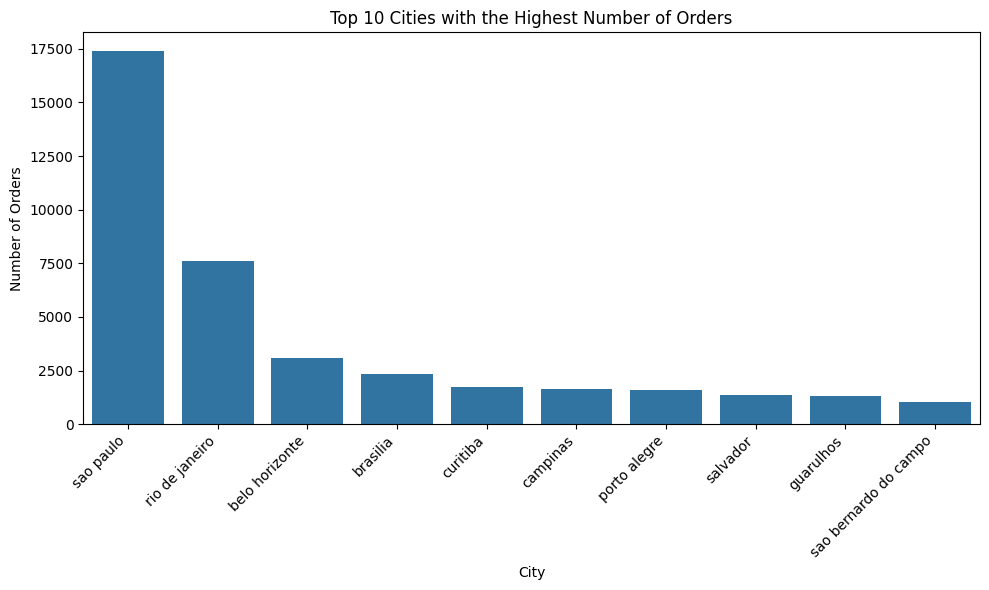

In [54]:
top_ten_cities = merge_order_product_cust['customer_city'].value_counts().nlargest(10)
print(top_ten_cities)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_cities.index, y=top_ten_cities.values)
plt.title('Top 10 Cities with the Highest Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [55]:
top_cities = merge_order_product_cust['customer_city'].value_counts().nlargest(10).index
filtered_df = merge_order_product_cust[merge_order_product_cust['customer_city'].isin(top_cities)]
grouped_data = filtered_df.groupby(['customer_city', 'product_category_name_english'])['order_id'].count().reset_index()
grouped_data.rename(columns={'order_id': 'count'}, inplace=True)
result = grouped_data.groupby('customer_city').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
print(result)

            customer_city product_category_name_english  count
0          belo horizonte                bed_bath_table    348
1          belo horizonte                 health_beauty    267
2          belo horizonte         computers_accessories    251
3                brasilia                 health_beauty    242
4                brasilia                sports_leisure    216
5                brasilia                bed_bath_table    203
6                campinas                bed_bath_table    165
7                campinas                 health_beauty    148
8                campinas               furniture_decor    133
9                curitiba               furniture_decor    151
10               curitiba                sports_leisure    151
11               curitiba         computers_accessories    143
12              guarulhos                bed_bath_table    133
13              guarulhos                 health_beauty    127
14              guarulhos               furniture_decor

<ipython-input-55-7c93abefe735>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped_data.groupby('customer_city').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


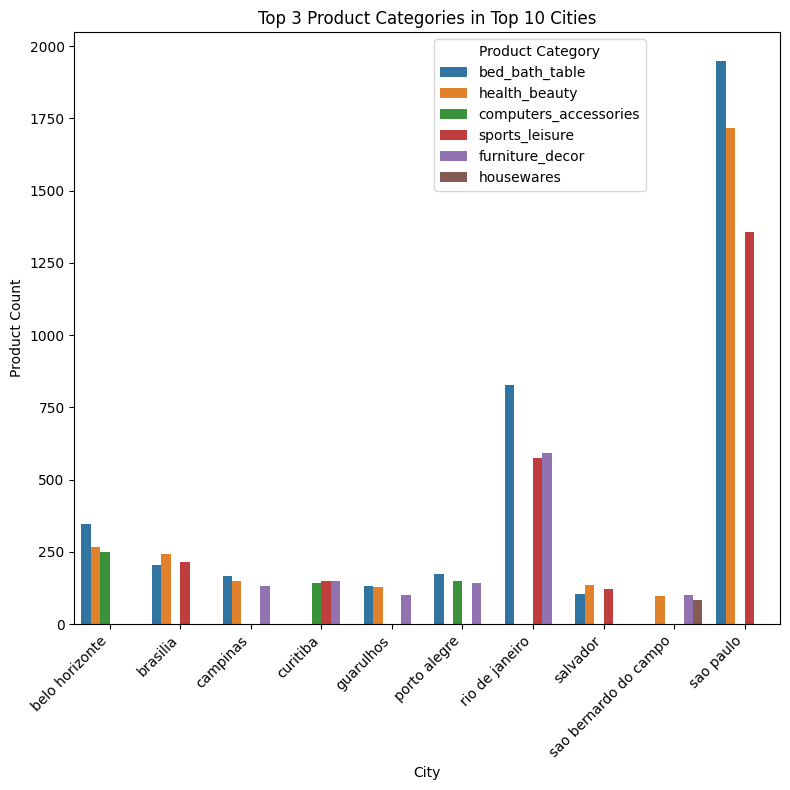

In [56]:
plt.figure(figsize=(8, 8))
sns.barplot(x='customer_city', y='count', hue='product_category_name_english', data=result)
plt.title('Top 3 Product Categories in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

In [60]:
# Step 1: Create a GeoDataFrame from the points
geo_df['geometry'] = [Point(xy) for xy in zip(geo_df['geolocation_lng'], geo_df['geolocation_lat'])]
geo_df = gpd.GeoDataFrame(geo_df, geometry='geometry', crs="EPSG:4326")

# Step 2: Reproject to a projected CRS for accurate buffer calculations
geo_df = geo_df.to_crs(epsg=3857)

# Step 3: Create buffers (e.g., 500 meters around each point)
geo_df['buffer'] = geo_df.geometry.buffer(500)

# Step 4: Group by ZIP code and combine buffers into MultiPolygon
multi_polygons = geo_df.groupby('geolocation_zip_code_prefix')['buffer'].apply(lambda group: unary_union(group))

# Step 5: Create a new GeoDataFrame for the combined MultiPolygons
result_gdf = gpd.GeoDataFrame(
    multi_polygons,
    columns=['geometry'],
    crs=geo_df.crs
).reset_index()

# Step 6: Reproject back to WGS 84 for visualization or mapping
result_gdf = result_gdf.to_crs(epsg=4326)

geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,buffer
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-5191862.242 -2698137.025),"POLYGON ((-5191362.242 -2698137.025, -5191364...."
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-5192269.608 -2698198.673),"POLYGON ((-5191769.608 -2698198.673, -5191772...."
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-5191885.314 -2697987.775),"POLYGON ((-5191385.314 -2697987.775, -5191387...."
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-5192119.966 -2697646.055),"POLYGON ((-5191619.966 -2697646.055, -5191622...."


In [ ]:
# Plot the original points
plt.figure(figsize=(10, 10))
geo_df.to_crs(epsg=4326).plot(ax=plt.gca(), color='blue', markersize=10, label='Original Points')

# Plot the resulting MultiPolygons
# Change aspect to 'equal' to avoid potential issues with aspect calculation
result_gdf.plot(ax=plt.gca(), color='orange', alpha=0.5, edgecolor='black', label='Buffers Combined', aspect='equal')

# Add title and legend
plt.title("MultiPolygons by ZIP Code", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1
  Kota yang paling banyak transaksi yang berhasil terkirim/delivered adalah Sao Paulo dengan total transaksi 17.398. Berdasarkan hasil bar chart yang sudah dibuat, untuk urutan 1-4 memiliki ketimpangan yang cukup jauh, tapi untuk urutan selanjutnya memiliki perbedaan angka yang tidak terlalu jauh.

- Conclution pertanyaan 2
  Dari 10 kota yang miliki transaksi yang berhasil terkirin/delivered terbanyak. Terdapat 3 kategori barang yang sering di beli di kota-kota tersebut, yaitu:
  1.   bed_bath_table
  2.   health_beauty
  3.   computers_accesssories

